In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)

In [4]:
import pandas as pd 

In [5]:
df = pd.DataFrame()

In [6]:
df['X'] = X.reshape(100)
df['y'] = y

In [7]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

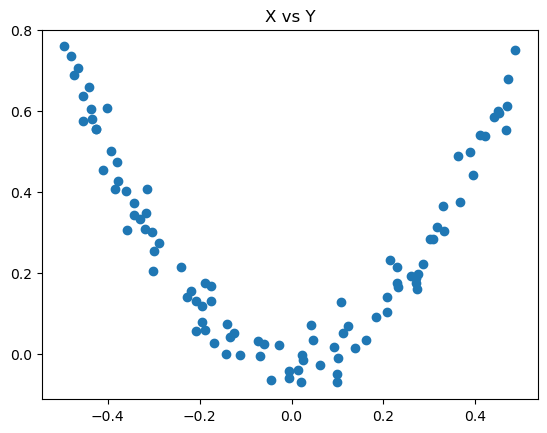

In [8]:
plt.scatter(df['X'], df['y'])
plt.title('X vs Y')

In [11]:
# M1 - As we know that model1 is the mean of the output column of given dataset
df['pred1'] = df['y'].mean()

In [12]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [13]:
# Residual = actual(y) - predicted(pred1)
df['res1'] = df['y'] - df['pred1']

In [14]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


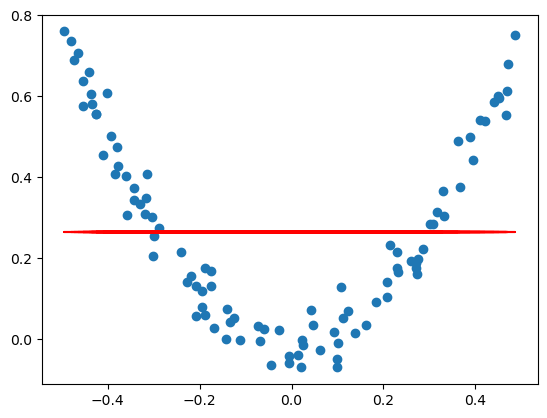

In [15]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'],df['pred1'],color='red')

# red line indicated model M1

In [17]:
# For model M2 we need decision tree in which for prediction X as input and Res1 as output
from sklearn.tree import DecisionTreeRegressor

In [18]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)  #(b/w 8 and 32 mostly max_leaf_node value as scientifically proven )

In [19]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

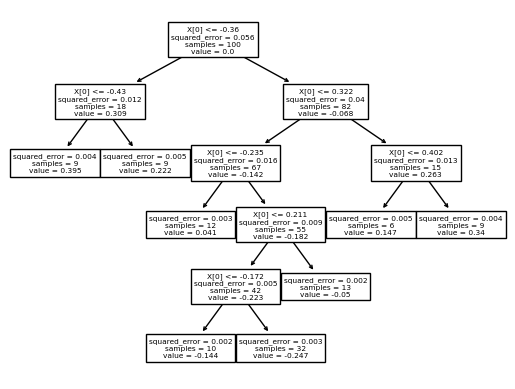

In [20]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [21]:
# Generating test set 
X_test = np.linspace(-0.5, 0.5, 500)

In [22]:
# 0.265458 = Ouput of M1 (MEAN)
# Y_pred2 = M1+M2

y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1))

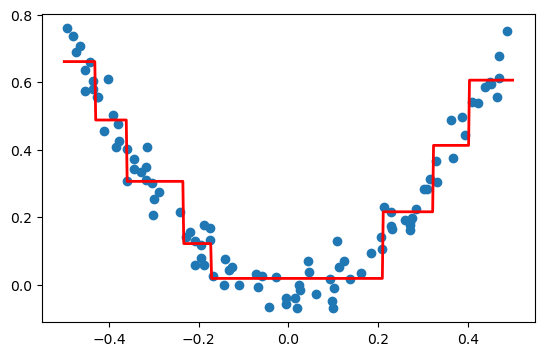

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [40]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [41]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [42]:
df['res2'] = df['y'] - df['pred2']

In [43]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [44]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [45]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [46]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs Y')

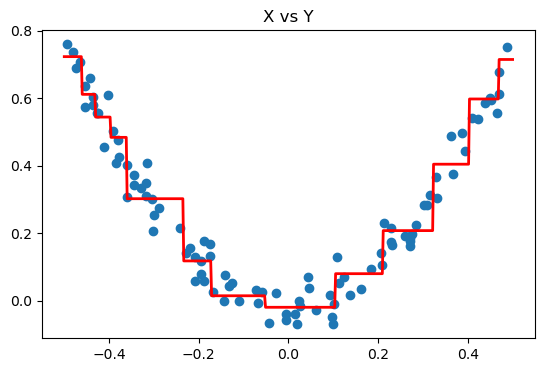

In [47]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [48]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


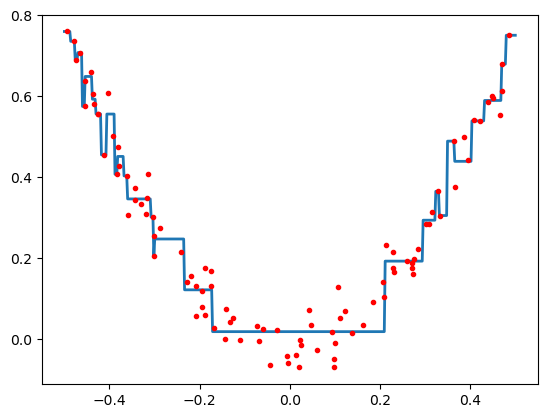

4


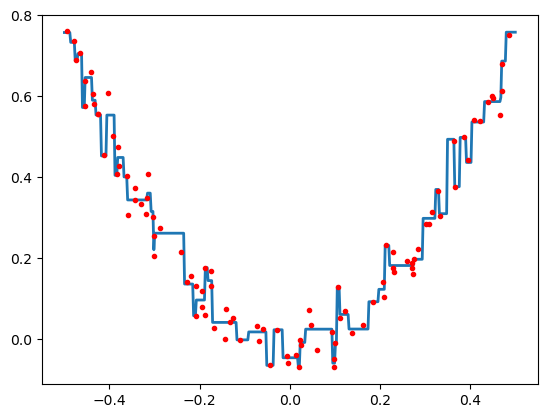

3


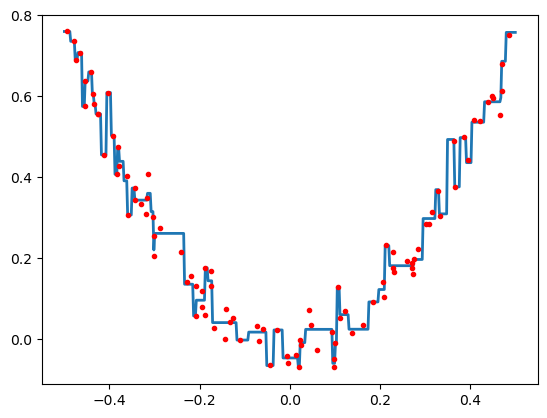

2


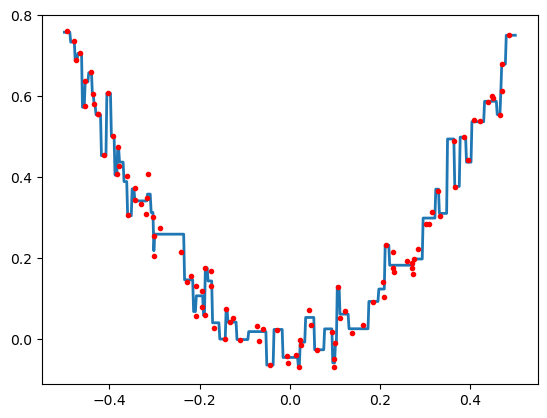

1


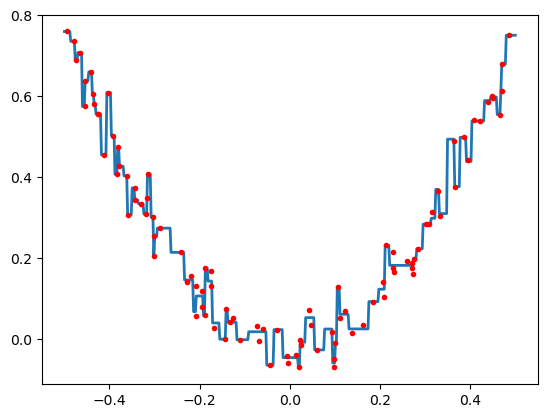

In [49]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)